*출처:http://www.sthda.com/english/wiki/r-basics-quick-and-easy*


# 1. R 과 ggplot2

`R` 은 강력한 통계기능을 가지면서 완전 무료인 컴퓨터 언어입니다. `ggplot2`는 R의 시각화 라이브러리로 쉬운 사용과 세련된 시각화를 제공합니다. 구체적인 내용은 [링크](http://www.sthda.com/english/wiki/r-basics-quick-and-easy)를 확인하세요.

## 1.3 R의 자료형

1. R에는 기본적으로 numeric, character, logical 자료형이 있습니다. 아래에서 간단히 살펴 보겠습니다.

``` R
my_age <- 28 # Numeric 
my_name <- "Nicolas" # Character 
# Are you a data scientist?: (yes/no) <=> (TRUE/FALSE)
is_datascientist <- TRUE # logical 
```

2. 벡터(Vectors): 여러값들의 집합입니다.
    * `c()` 함수를 이용해 벡터를 생성합니다. 
    * 다음의 함수들을 지원합니다. `max(x)`,`min(x)`, `length(x)`, `sum(x)`, `mean(x)`, `sd(x)`,`var(x)`

```R
# Create a numeric vector
friend_ages <- c(27, 25, 29, 26)
mean(friend_ages) # => 26.75
max(friend_ages) # => 29
friend_ages[2] # age of my friends number 2 => 25
```

3. 행렬(Matrices): 엑셀의 시트처럼 여러 행과 열로 구성되어 있습니다. 각각의 행과 열은 벡터로 구성되죠. 
   * 행렬을 생성할 때는 `cbind()` 함수를 사용합니다.
   * 행열의 이름을 변경할때는 `rownames(x)`,`colnames(x)` 함수를 사용합니다.
   * 계산을 위한 함수: `rowSums(x)`, `colSums(x)`, `rowMeans(x)`, `colMeans(x)`을 제공합니다.

```R
# Numeric vectors
col1 <- c(5, 6, 7, 8, 9)
col2 <- c(2, 4, 5, 9, 8)
col3 <- c(7, 3, 4, 8, 7)
# Combine the vectors by column
my_data <- cbind(col1, col2, col3)
# Change rownames
rownames(my_data) <- c("row1", "row2", "row3", "row4", "row5")
```  
  
- 요인(Factors): 자료를 그룹화하는 변수
  * `factor()`으로 생성합니다.
  * 요인값을 계산하기 위한 함수:
      + 각각의 카테고리의 갯수를 계산할때는 `summary(x)`, `table(x)`
      + 각각의 간단한 통계을 구할때는 `tapply() `
      
```R
# Create a factor
friend_groups <- factor(c("grp1", "grp2", "grp1", "grp2"))
levels(friend_groups) # => "grp1", "grp2"
# Compute the mean age by groups
friend_ages <- c(27, 25, 29, 26)
tapply(friend_ages, friend_groups, mean)
```
  
- 데이터 프레임(Data frames): 행렬과 비슷하지만 행의 자료형을 다르게 지정 할수 있습니다. 
   * `data.frame()`으로으생성합니다.
 
```R
# Create a data frame
friends_data <- data.frame(
name = c("Nicolas", "Thierry", "Bernard", "Jerome"),
age = c(27, 25, 29, 26) ,
height = c(180, 170, 185, 169),
married = c(TRUE, FALSE, TRUE, TRUE))
```

보다 자세한 내용은 [링크](http://www.sthda.com/english/wiki/easy-r-programming-basics)를 확인하세요. 필요한 패키지를 아래와 같이 불러옵니다.


In [57]:
library(ggplot2)
library(plyr)
# library(gridExtra)

# 2. ggplot2은 무엇인가?

**ggplot2**는 아죽 강력하면서도 유연한 R의 패키지입니다. *Hadley Wickham* 이 미려한 시각화를 위해 만들었습니다. 
ggplot의 gg는 Grammar of Graphics을 뜻합니다. 시각화를 위한 문법이라는 뜻이죠. 그에 따라서 다음과 같은 방식으로 작동합니다. 

    Plot(그림) = Data(자료) + Aesthetics(미학적 설정) + Geometry(기하학적 설정).
  
  
- 자료(Data): 데이터 프레임형식을 사용합니다.
- 미학적 설정(Aesthetics): x,y 변수를 지정하고, 색이나 크기 그리고 모양등등을 지정해 줍니다. 
- 기하학적 설정(Geometry): 다양한 유형의 그래프 형태를 지정해 줍니다. 예를 들면, histogram, box plot, line plot,density plot, dot plot 등이 있습니다.

## 2.2 ggplot2 패키지 설치하고 불러오기

아래와 같은 R 코드로 설치하고 불러 올수 있습니다. 

```R
# Installation
install.packages('ggplot2')
# Loading
library(ggplot2)
```

## 2.3 Multiple plot function

`ggplot2`에서는 기본적으로 한페이지에 하나의 그림이 그려집니다. 한페이지에 여러 그림을 넣는 subplots을 사용하기 위해서는 아래와 같은 함수를 정의해 사용하겠습니다.


In [1]:
# Multiple plot function
#
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}



# 3. Area plot


In [56]:
set.seed(1234)
wdata = data.frame(
sex = factor(rep(c("F", "M"), each=200)),
weight = c(rnorm(200, 55), rnorm(200, 58)))
head(wdata, 4)

sex,weight
F,53.79293
F,55.27743
F,56.08444
F,52.65430


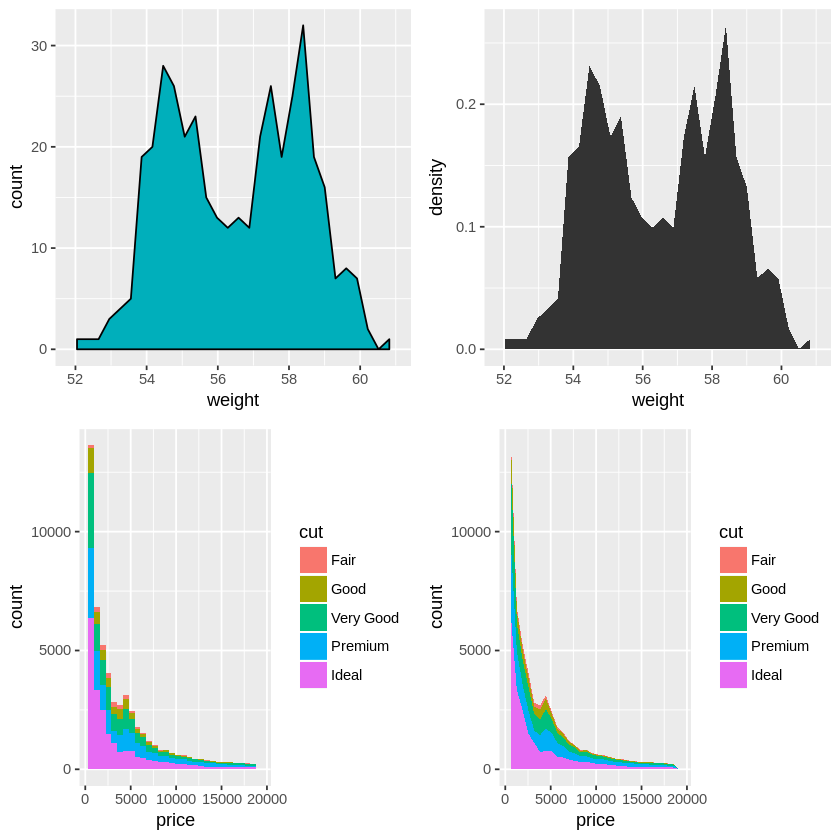

In [48]:
a <- ggplot(wdata, aes(x = weight))
# Basic plot
# Change line and fill colors
a1 <- a + geom_area(stat = "bin", color= "black", fill="#00AFBB", bins = 30)
a2 <- a + geom_area(aes(y = ..density..), stat ="bin", bins = 30)

# Load the data
data("diamonds")
p <- ggplot(diamonds, aes(x = price, fill = cut))
# Bar plot
p1 <- p + geom_bar(stat = "bin", bins = 30)
# Area plot
p2 <- p + geom_area(stat = "bin", bins = 30)
multiplot(a1, p1,a2, p2, cols=2)

Note that, by default y axis corresponds to the count of weight values. If you want
to change the plot in order to have the density on y axis, the R code would be as
follow.

The following plots compares bar plots and area plots. The diamonds data set [in
ggplot2 package] is used.

# 4. Density Plots
## 4.1 Basic density plots

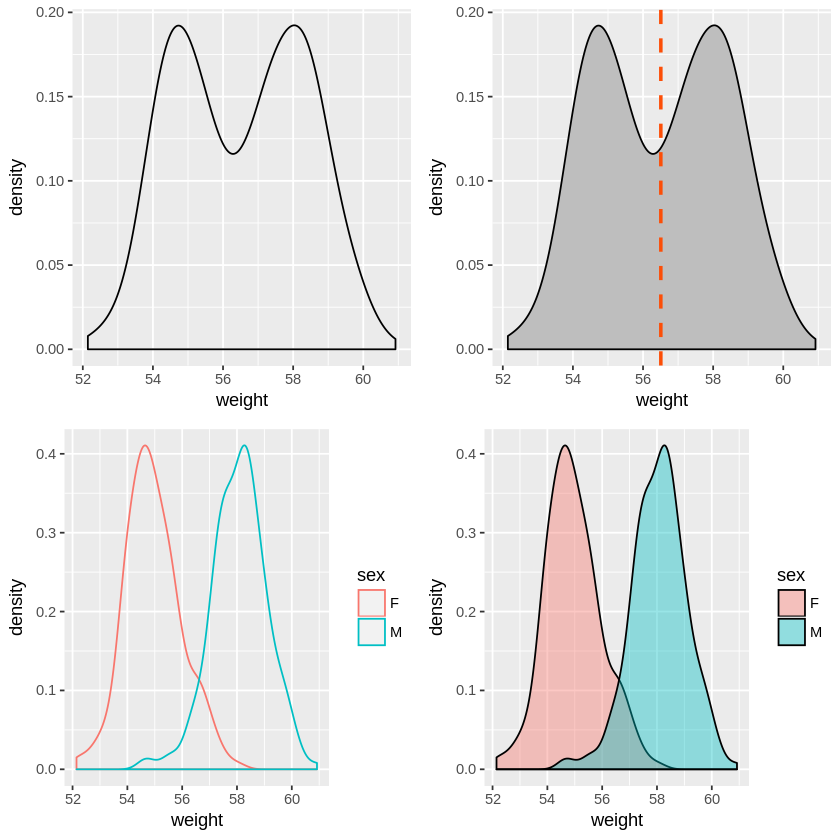

In [49]:
# Basic plot
a1 <- a + geom_density()
# Change line color and fill color, add mean line
a2 <- a + geom_density(color = "black", fill = "gray")+
geom_vline(aes(xintercept=mean(weight)),
color="#FC4E07", linetype="dashed", size=1)
## 4.2 Change colors by groups
# Density plot line and fill colors can be automatically controlled by the levels of sex

# Change line colors by sex
a3 <- a + geom_density(aes(color = sex))
# Change fill color by sex
# Use semi-transparent fill: alpha = 0.4
a4 <- a + geom_density(aes(fill = sex), alpha=0.4)

multiplot(a1, a3, a2, a4, cols=2)

# 5. Histogram Plots
A Histogram represents the distribution of a continuous variable by dividing
into bins and counting the number of observations in each bin. The function
geom_histogram() is used to create a histogram plot. You can also add a line
for the mean using the function geom_vline()

## 5.1 Basic histogram plots


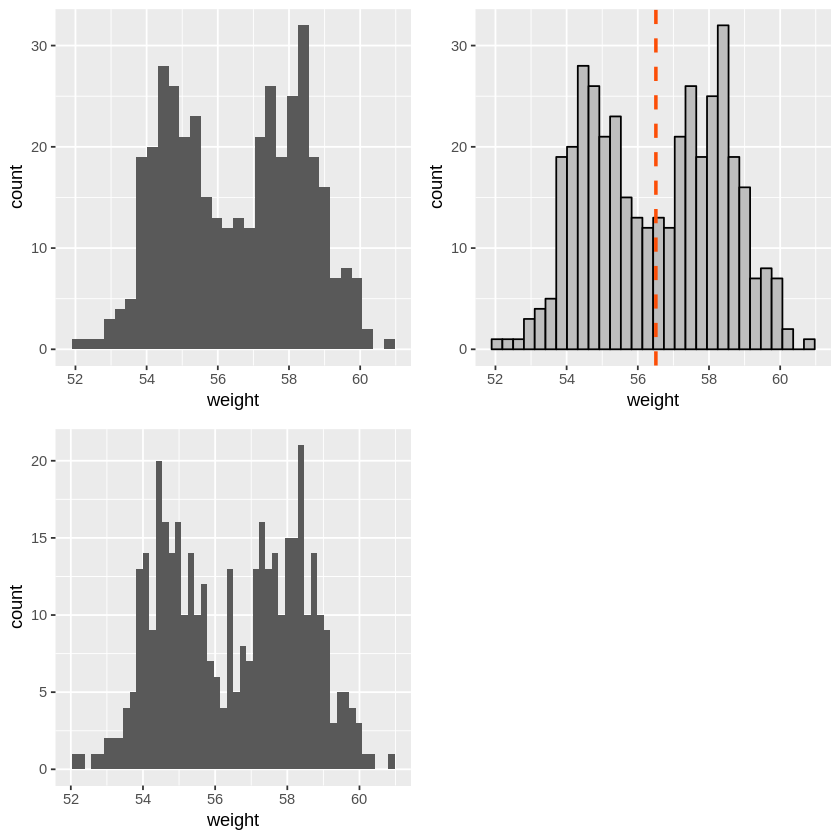

In [50]:
# Basic plot
a1 <- a + geom_histogram(bins = 30)
# Change the number of bins
a2 <- a + geom_histogram(bins = 50)
# Change line color and fill color, add mean line
a3 <- a + geom_histogram(color = "black", fill = "gray", bins = 30)+
geom_vline(aes(xintercept=mean(weight)),
color="#FC4E07", linetype="dashed", size=1)
multiplot(a1, a2, a3, cols=2)

## 5.2 Change colors by groups

Histogram plot line colors can be automatically controlled by the levels of the variable sex.

# 6. Combine Histogram and Density Plots

- Plot histogram with density values on y-axis (instead of count values).
- Add density plot with transparent density plot


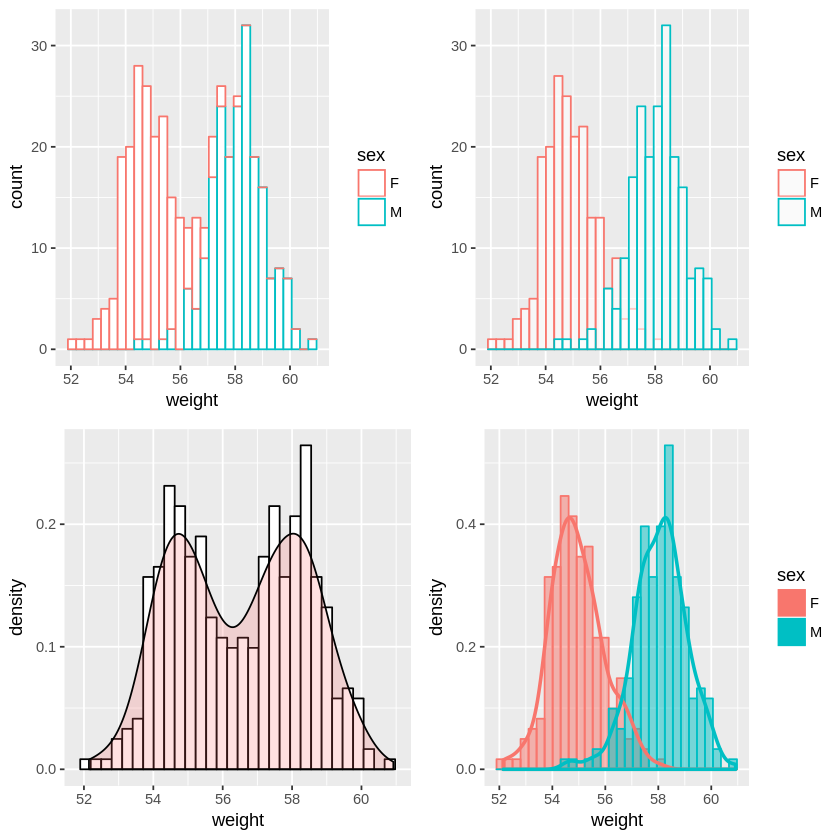

In [51]:
# Change line colors by sex
a1 <- a + geom_histogram(aes(color = sex), fill = "white", bins = 30)
# Position adjustment: "identity" (overlaid)
a2 <- a + geom_histogram(aes(color = sex), fill = "white", alpha = 0.6,
position="identity", bins = 30)
# multiplot(a1, a2, cols=2)

# Histogram with density plot
a3 <- a + geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 30) +
geom_density(alpha=0.2, fill = "#FF6666")
# Color by groups
a4 <- a + geom_histogram(aes(y=..density.., color = sex, fill = sex),
alpha=0.5, position="identity", bins = 30)+
geom_density(aes(color = sex), size = 1)
multiplot(a1, a3, a2, a4, cols=2)

# 9. ECDF Plots

ECDF (Empirical Cumulative Density Function) reports for any given number the
percent of individuals that are below that threshold.



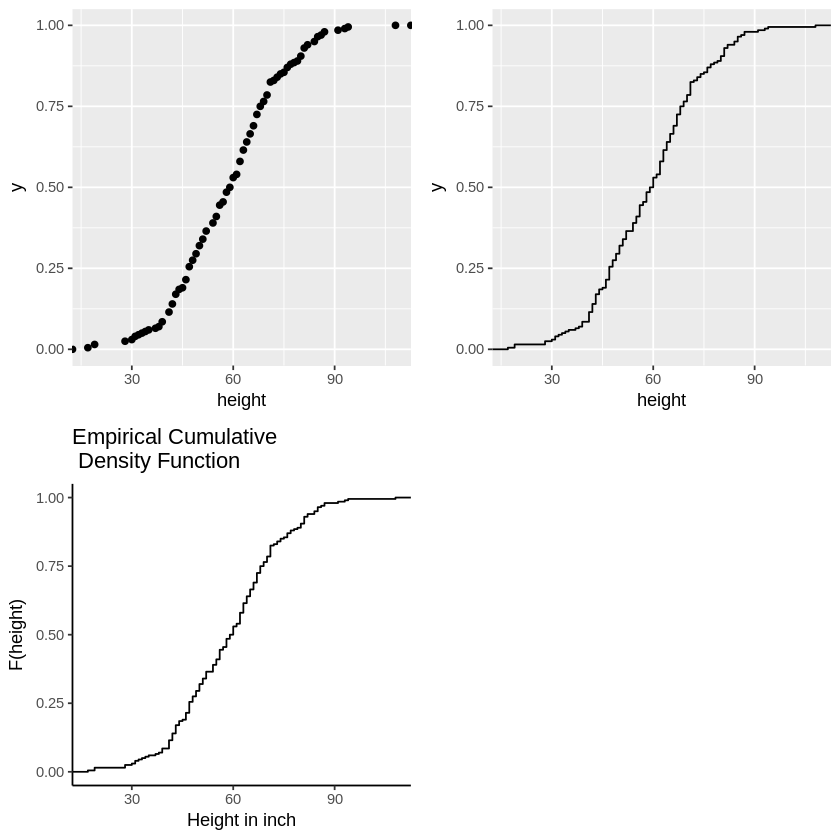

In [53]:
df <- data.frame(height = round(rnorm(200, mean=60, sd=15)))


a1 <- ggplot(df, aes(height)) + stat_ecdf(geom = "point")
a2 <- ggplot(df, aes(height)) + stat_ecdf(geom = "step")
# Basic ECDF plot
a3 <-ggplot(df, aes(height)) + stat_ecdf(geom = "step")+
labs(title="Empirical Cumulative \n Density Function",
     y = "F(height)", x="Height in inch")+
theme_classic()
multiplot(a1, a3, a2, cols=2)

# 10. QQ Plots
QQ-plots (or Quantile - Quantile plots) are used to check whether a given data
follows normal distribution. The function stat_qq() or qplot() can be used to create
qq-plots.

- mtcars data sets are used in the examples below.

In [12]:
data(mtcars)
# Convert cyl column from a numeric to a factor variable
mtcars$cyl <- as.factor(mtcars$cyl)
head(mtcars[, c("mpg", "cyl")])

,mpg,cyl
Mazda RX4,21.0,6
Mazda RX4 Wag,21.0,6
Datsun 710,22.8,4
Hornet 4 Drive,21.4,6
Hornet Sportabout,18.7,8
Valiant,18.1,6


Create qq plots

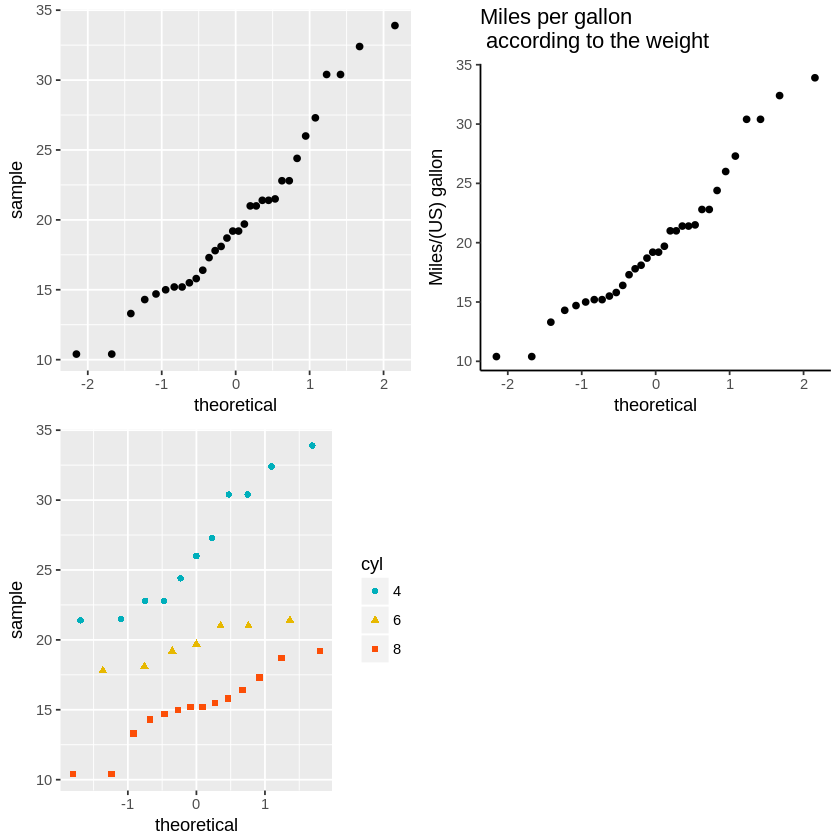

In [54]:
p <- ggplot(mtcars, aes(sample=mpg))
# Basic plot
p1 <- p + stat_qq()
# Change point shapes by groups
# Use custom color palettes
p2 <- p + stat_qq(aes(shape = cyl, color = cyl))+
scale_color_manual(values=c("#00AFBB", "#E7B800", "#FC4E07"))
p3 <- qplot(sample = mpg, data = mtcars)+
labs(title="Miles per gallon \n according to the weight",
       y = "Miles/(US) gallon")+
theme_classic()

multiplot(p1, p2, p3, cols = 2)

# 11. Bar Plots of Counts

The function geom_bar() can be used to visualize one discrete variable. In this case,
the count of each level is plotted.

We’ll use the mpg data set [in ggplot2 package]. The R code is as follow:


In [59]:
data(mpg)

data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- rename(data_sum, c("mean" = varname))
 return(data_sum)
}

df3 <- data_summary(ToothGrowth, varname="len", 
                    groupnames=c("supp", "dose"))
# Convert dose to a factor variable
df3$dose=as.factor(df3$dose)
head(df3)

supp,dose,len,sd
OJ,0.5,13.23,4.459709
OJ,1,22.70,3.910953
OJ,2,26.06,2.655058
VC,0.5,7.98,2.746634
VC,1,16.77,2.515309
VC,2,26.14,4.797731


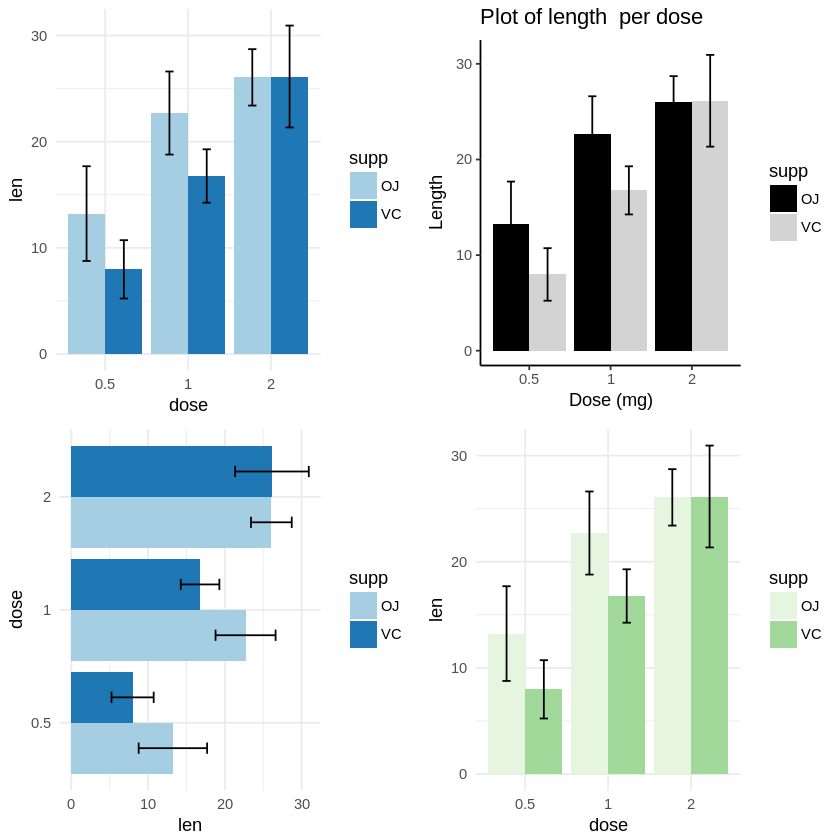

In [63]:
# Standard deviation of the mean as error bar
p <- ggplot(df3, aes(x=dose, y=len, fill=supp)) + 
   geom_bar(stat="identity", position=position_dodge()) +
  geom_errorbar(aes(ymin=len-sd, ymax=len+sd), width=.2,
                 position=position_dodge(.9))
  
p1 <- p + scale_fill_brewer(palette="Paired") + theme_minimal()
# Horizontal bar plot
p2 <- p1 + coord_flip()

# Change color by groups
# Add error bars
p3 <- p + labs(title="Plot of length  per dose", 
         x="Dose (mg)", y = "Length")+
   scale_fill_manual(values=c('black','lightgray'))+
   theme_classic()

# Greens
p4 <- p + scale_fill_brewer(palette="Greens") + theme_minimal()

multiplot(p1, p2, p3, p4, cols = 2)

# 12. Scatter plots: Continuous X and Y

We’ll use the mtcars data set. The variable cyl is used as grouping variable.

We start by creating a plot, named b, that we’ll finish in the next section by adding a
layer.

## 12.3 Basic scatter plots
The function geom_point() is used to create a scatter plot.



In [22]:
# Convert cyl column from a numeric to a factor variable
mtcars$cyl <- as.factor(mtcars$cyl)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


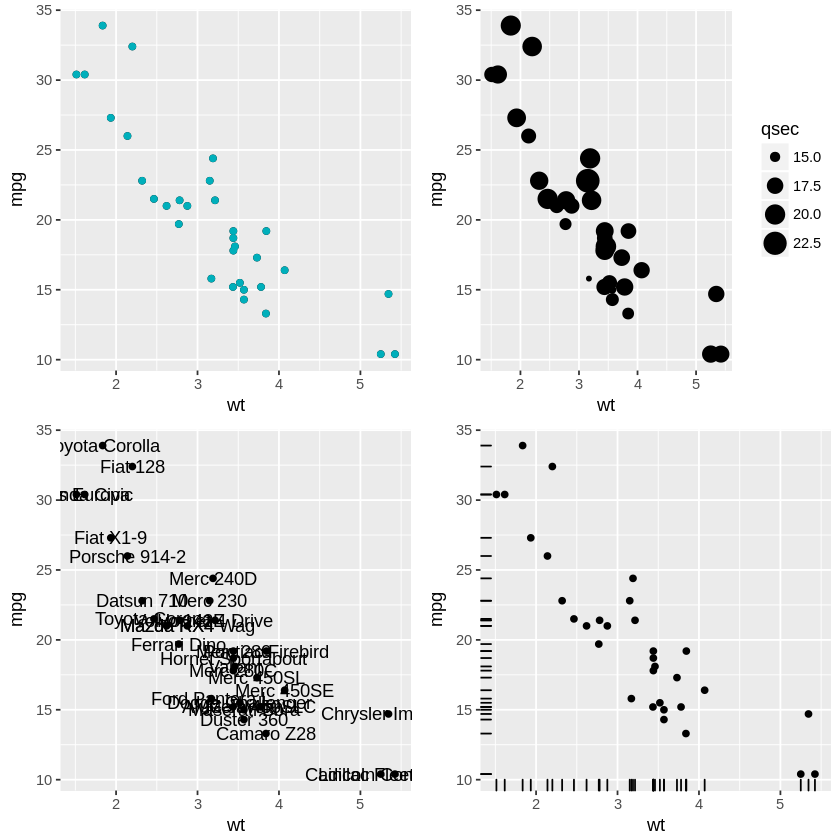

In [68]:
# Basic scatter plot
b <- ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() +
    geom_point(color = "#00AFBB")
# Label points in the scatter plot
b2<- ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + 
  geom_text(label=rownames(mtcars))

# Change the point size
b3 <- ggplot(mtcars, aes(x=wt, y=mpg)) + 
  geom_point(aes(size=qsec))

# Add marginal rugs
b4 <- ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + geom_rug()

multiplot(b1,b2,b3,b4, cols = 2)

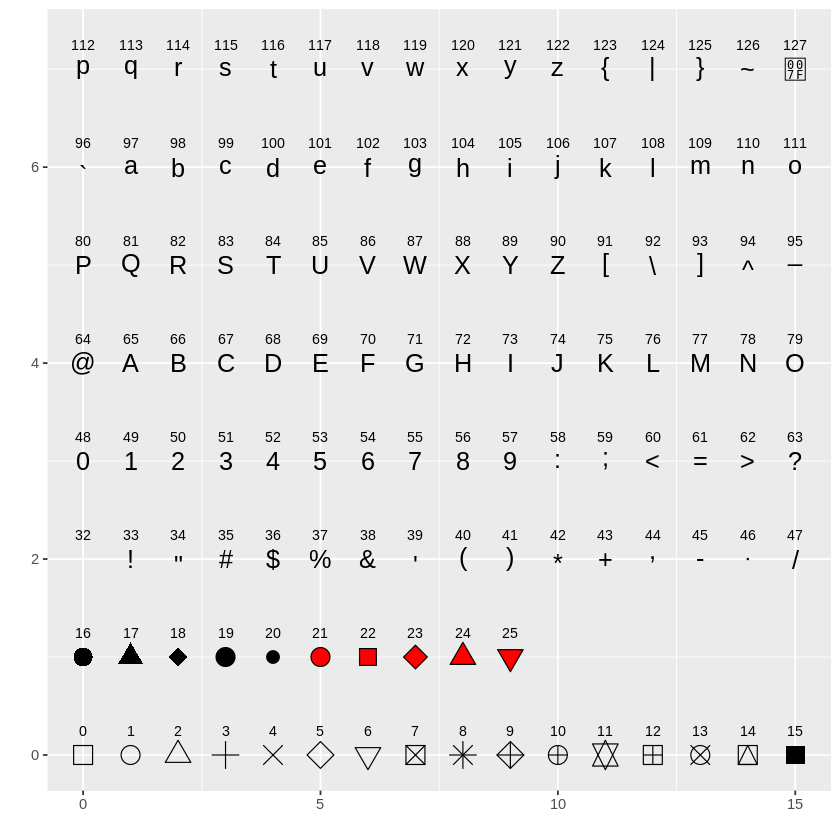

In [24]:
d=data.frame(p=c(0:25,32:127))
ggplot() +
scale_y_continuous(name="") +
scale_x_continuous(name="") +
scale_shape_identity() +
geom_point(data=d, mapping=aes(x=p%%16, y=p%/%16, shape=p), size=5, fill="red") +
geom_text(data=d, mapping=aes(x=p%%16, y=p%/%16+0.25, label=p), size=3)

## 12.4 Scatter plots with multiple groups

This section describes how to change point colors and shapes automatically and
manually.
1. Change the point color/shape/size automatically: In the R code below, point shapes, colors and sizes are controlled automatically by the levels of the grouping variable cyl :


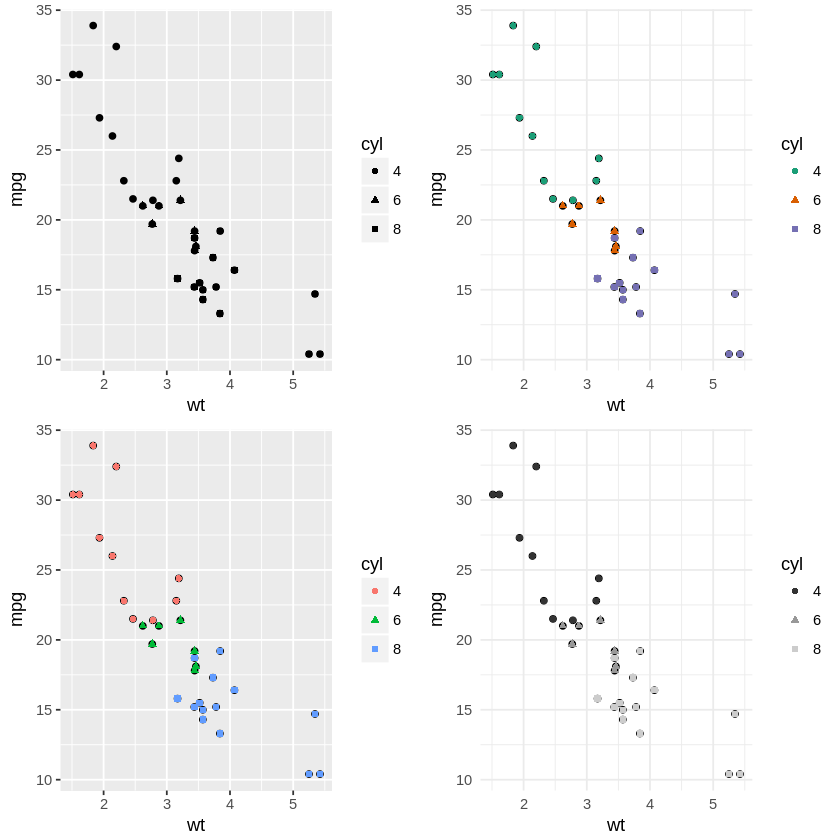

In [25]:
# Change point shapes by the levels of cyl
b1 <- b + geom_point(aes(shape = cyl))
# Change point shapes and colors
b2 <- b + geom_point(aes(shape = cyl, color = cyl))
# use brewer color palettes
b3 <- b + geom_point(aes(color = cyl, shape = cyl)) +
scale_color_brewer(palette="Dark2") + theme_minimal()
# Use grey scale
b4 <- b + geom_point(aes(color = cyl, shape = cyl)) +
scale_color_grey()+ theme_minimal()
multiplot(b1,b2,b3,b4, cols = 2)

## 12.5 Add regression line or smoothed conditional mean
Only the function geom_smooth() is covered in this section. A simplified format is :
```R
geom_smooth(method="auto", se=TRUE, fullrange=FALSE, level=0.95)
```
- method : smoothing method to be used. Possible values are lm, glm, gam, loess, rlm.
    + method = “loess”: This is the default value for small number of observations. It computes a smooth local regression. You can read more about loess using the R code ?loess.
    + method =“lm”: It fits a linear model. Note that, it’s also possible to indicate the formula as formula = y ~ poly(x, 3) to specify a degree 3 polynomial.
- se : logical value. If TRUE, confidence interval is displayed around smooth.
- fullrange : logical value. If TRUE, the fit spans the full range of the plot
- level : level of confidence interval to use. Default value is 0.95

To add a regression line on a scatter plot, the function geom_smooth() is used in combination with the argument method = lm. lm stands for linear model.


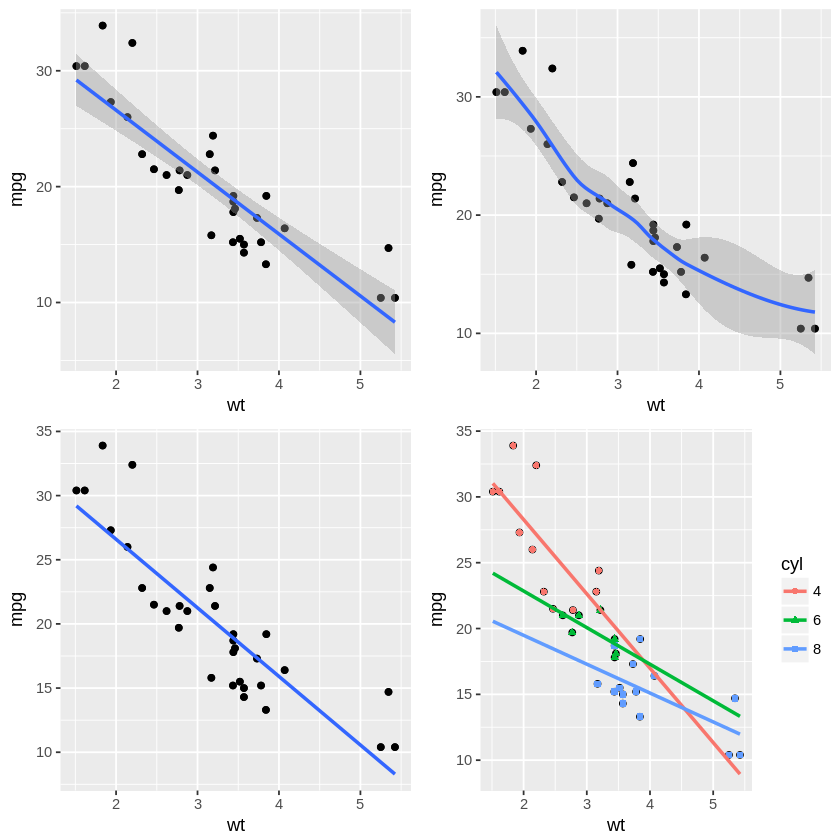

In [27]:
# Add regression line
b1 <- b + geom_point() + geom_smooth(method = lm)
# Point + regression line
# Remove the confidence interval
b2 <- b + geom_point() +
geom_smooth(method = lm, se = FALSE)
# loess method: local regression fitting
b3 <- b + geom_point() + geom_smooth(method = loess)
# Extend the regression lines: fullrange
b4 <- b + geom_point(aes(color = cyl, shape = cyl)) +
geom_smooth(aes(color = cyl), method = lm, se = FALSE,
fullrange = TRUE)
multiplot(b1,b2,b3,b4, cols = 2)

# 13. Continuous bivariate distribution


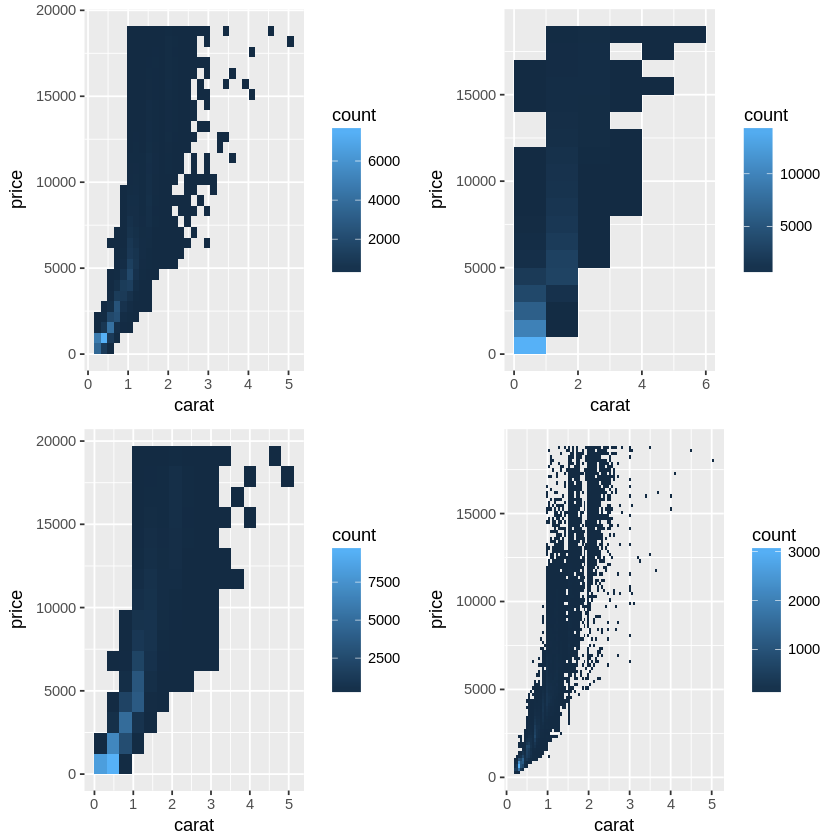

In [73]:
data(diamonds)
# head(diamonds[, c("carat", "price")])
c <- ggplot(diamonds, aes(carat, price))
# Default plot
c1 <- c + geom_bin2d()
# Change the number of bins
c2 <- c + geom_bin2d(bins = 15)
# Or specify the width of bins
c3 <- c + geom_bin2d(binwidth=c(1, 1000))
# Change the number of bins
c4 <- c + geom_bin2d(bins = 100)
multiplot(c1,c2,c3,c4, cols=2)

# 15. Box Plots
Box plots display a group of numerical data through their quartiles. 

The function geom_boxplot() is used to create a box plot. A simplified format is :

```R
geom_boxplot(outlier.colour = "black", outlier.shape = 16,
outlier.size = 2, notch = FALSE)
```

- outlier.colour, outlier.shape, outlier.size: The color, the shape and the size for outlying points
- notch: logical value. If TRUE, makes a notched box plot. The notch displays a confidence interval around the median which is normally based on the median +/- 1.58*IQR/sqrt(n). 
- Notches are used to compare groups; if the notches of two boxes do not overlap, this is a strong evidence that the medians differ.

## 15.1 Basic box plots



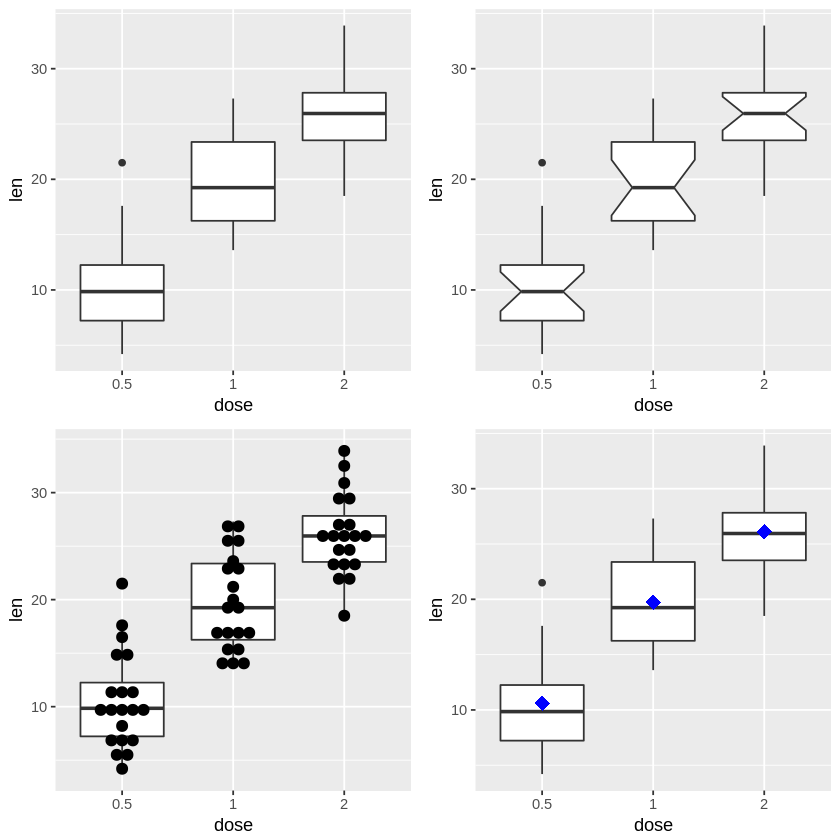

In [98]:
data("ToothGrowth")
ToothGrowth$dose <- as.factor(ToothGrowth$dose)
# head(ToothGrowth)
e <- ggplot(ToothGrowth, aes(x = dose, y = len))
# Basic box plot
e1 <- e + geom_boxplot()
# Box plot with dot plot
e2 <- e1 + geom_dotplot(binaxis='y', stackdir='center', dotsize=1, binwidth = 1)
# Notched box plot
e3 <- e + geom_boxplot(notch = TRUE)
# Box plot with mean points
e4 <- e + geom_boxplot() +
stat_summary(fun.y = mean, geom = "point",
shape = 18, size = 4, color = "blue")
multiplot(e1,e2,e3,e4, cols = 2)

Change colors by groups

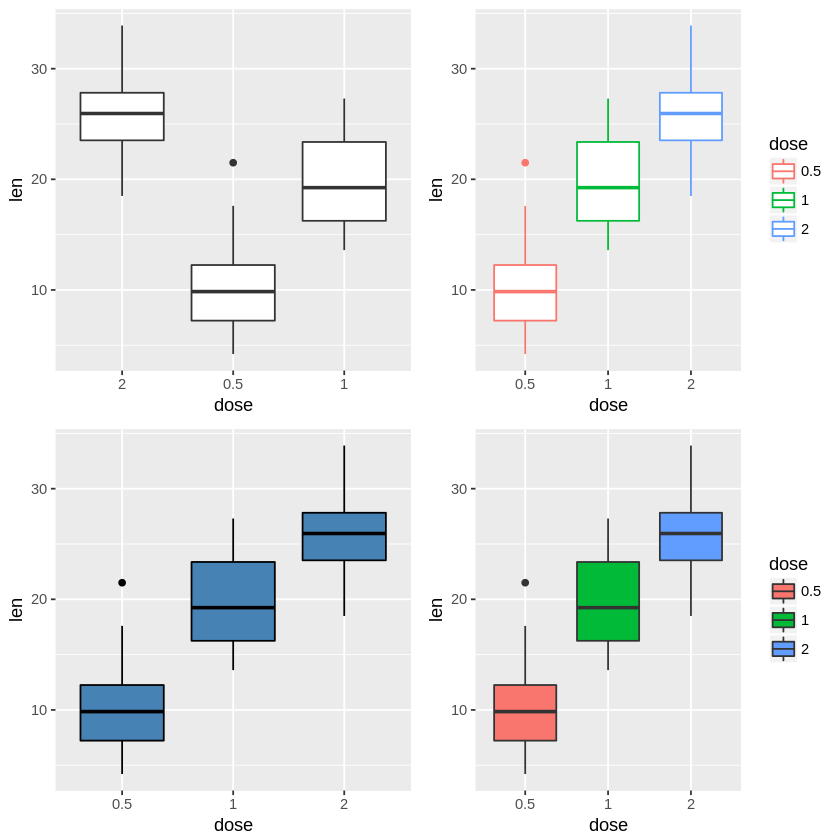

In [31]:
e1 <- e + geom_boxplot() +
scale_x_discrete(limits=c("2", "0.5", "1"))
# Use single colors
e2 <- e + geom_boxplot(color = "black", fill = "steelblue")
# Change outline colors by dose (groups)
e3 <- e + geom_boxplot(aes(color = dose))
# Change fill color by dose (groups)
e4 <- e + geom_boxplot(aes(fill = dose))
multiplot(e1,e2,e3,e4, cols = 2)

## 15.3 Box plot with multiple groups

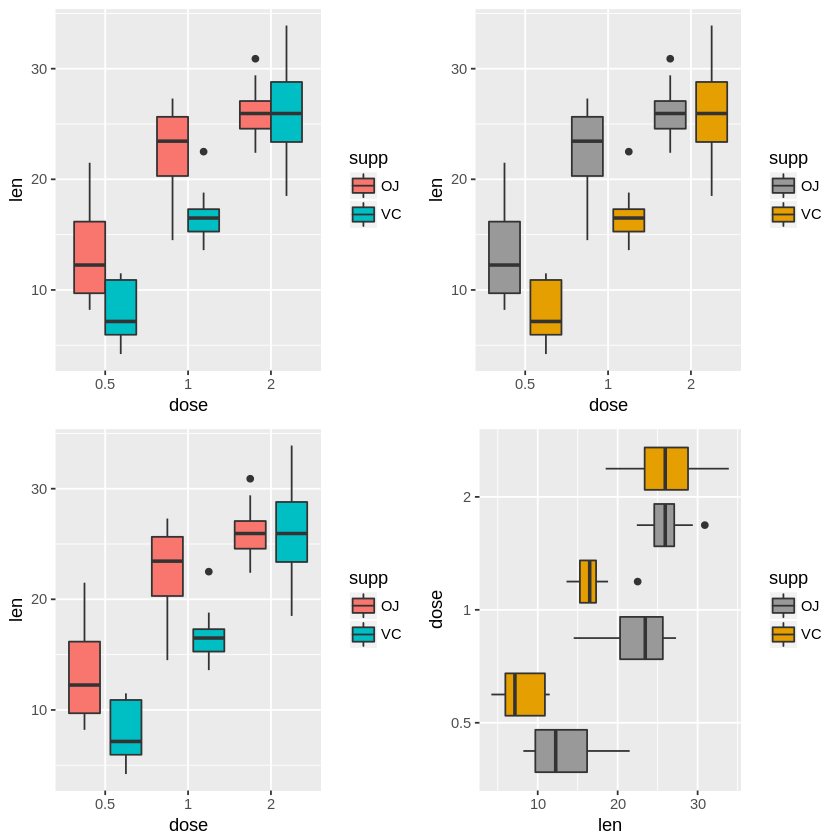

In [74]:
# Change box plot colors by groups
e1 <- e + geom_boxplot(aes(fill = supp))
# Change the position
e2 <- e + geom_boxplot(aes(fill = supp), position = position_dodge(1))
# Change fill colors
e3 <- e + geom_boxplot(aes(fill = supp), position = position_dodge(1)) +
scale_fill_manual(values=c("#999999", "#E69F00"))
e4 <- e3 + coord_flip()
multiplot(e1,e2,e3,e4, cols = 2)

# 16. Violin plots

Violin plots are similar to box plots (Chapter 15), except that they also show the
kernel probability density of the data at different values. Typically, violin plots will
include a marker for the median of the data and a box indicating the interquartile
range, as in standard box plots.


Warning message:
“Computation failed in `stat_summary()`:
Hmisc package required for this function”

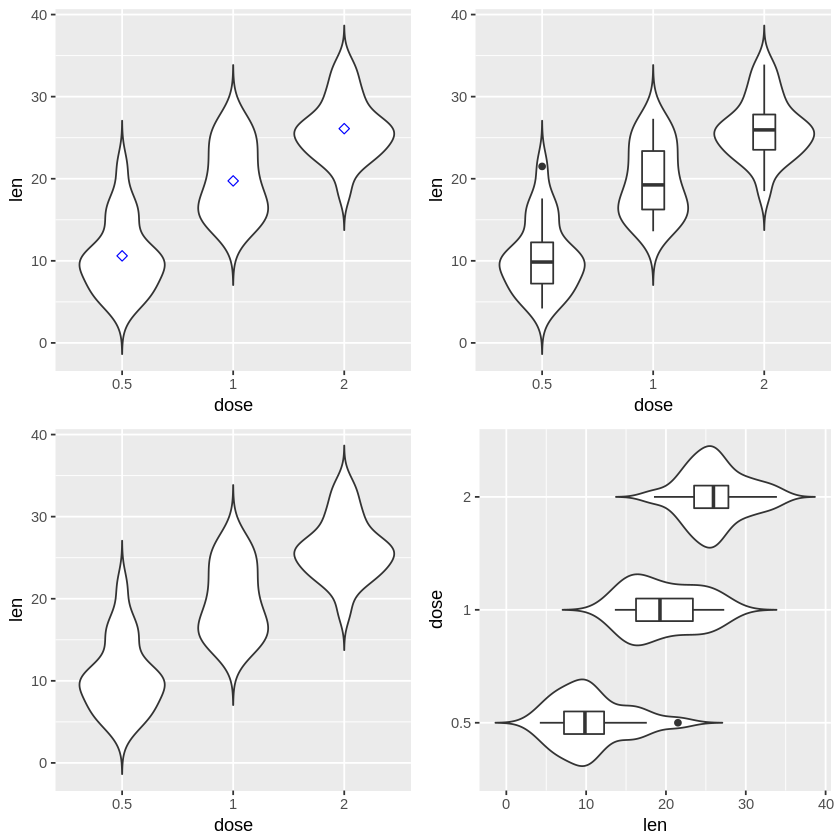

In [81]:
# Add mean or median point: use fun.y = mean or fun.y = median
e1 <- e + geom_violin(trim = FALSE) +
stat_summary(fun.y = mean, geom = "point",
shape = 23, size = 2, color = "blue")
# Add mean points +/- SD
# Use geom = "pointrange" or geom = "crossbar"
e2 <- e + geom_violin(trim = FALSE) +
stat_summary(fun.data="mean_sdl", fun.args = list(mult=1),
geom="pointrange", color = "red")
# Combine with box plot to add median and quartiles
e3 <- e + geom_violin(trim = FALSE) +
geom_boxplot(width = 0.2)
e4 <- e3 + coord_flip()
multiplot(e1,e2,e3,e4, cols = 2)

# 17. Dot Plots

The function geom_dotplot() is used to create a dot plot.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


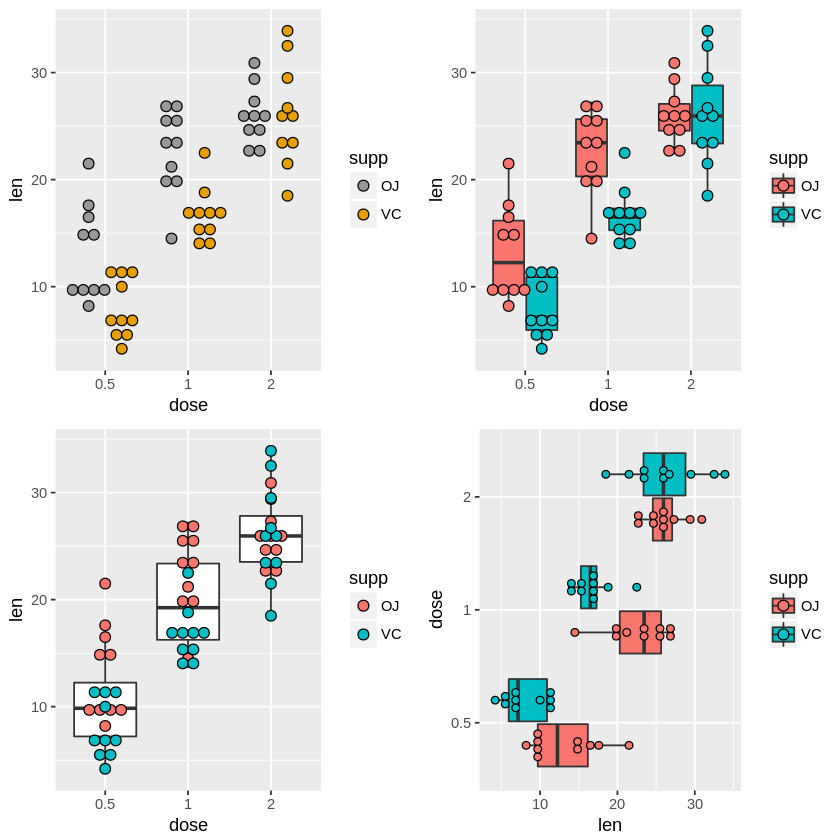

In [101]:
# Change colors
e1 <- e + geom_dotplot(aes(fill = supp), binaxis='y', stackdir='center',
position=position_dodge(0.8)) +
scale_fill_manual(values=c("#999999", "#E69F00"))
# Add box plots
e2 <- e + geom_boxplot(fill = "white") +
geom_dotplot(aes(fill = supp), binaxis='y', stackdir='center')
# Change the position
e3 <- e + geom_boxplot(aes(fill = supp), position=position_dodge(0.8))+
geom_dotplot(aes(fill = supp), binaxis='y', stackdir='center',
position=position_dodge(0.8))
e4 <- e3 + coord_flip()
multiplot(e1,e2,e3,e4, cols = 2)

# 19. Line Plots


In [43]:
df <- data.frame(time=c("breakfeast", "Lunch", "Dinner"),
                bill=c(10, 30, 15))

df2 <- data.frame(sex = rep(c("Female", "Male"), each=3),
                  time=c("breakfeast", "Lunch", "Dinner"),
                  bill=c(10, 30, 15, 13, 40, 17) )

head(df)



time,bill
breakfeast,10
Lunch,30
Dinner,15


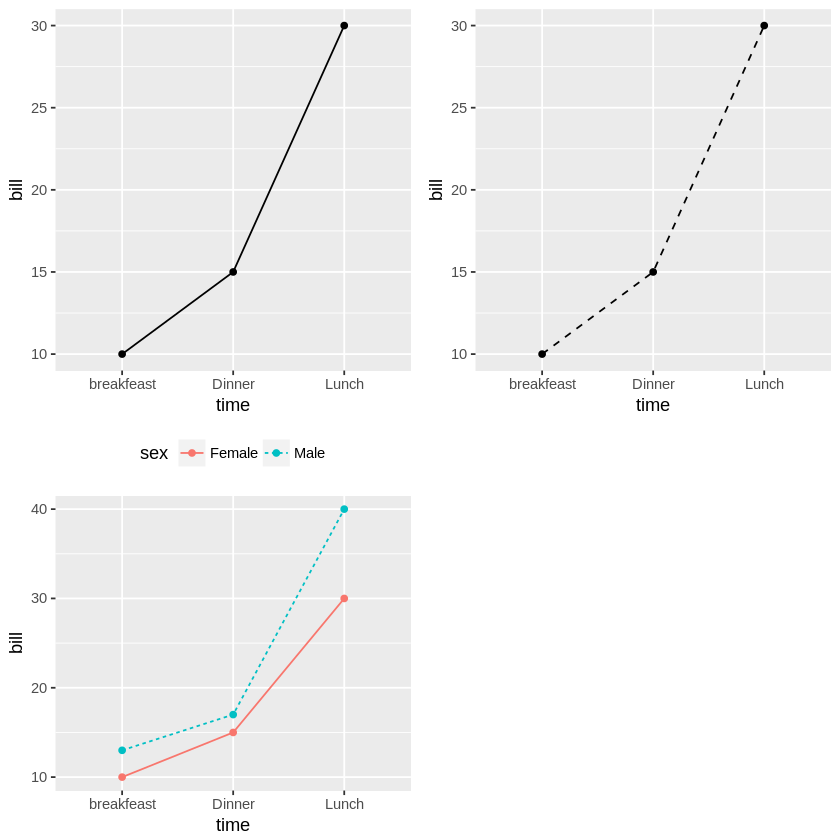

In [46]:
# Basic line plot with points
l1 <- ggplot(data=df, aes(x=time, y=bill, group=1)) +
  geom_line()+
  geom_point()
# Change the line type
l2 <- ggplot(data=df, aes(x=time, y=bill, group=1)) +
  geom_line(linetype = "dashed")+
  geom_point()
# Change line types + colors
l3 <- ggplot(df2, aes(x=time, y=bill, group=sex)) +
  geom_line(aes(linetype=sex, color=sex))+
  geom_point(aes(color=sex))+
  theme(legend.position="top")

multiplot(l1,l3,l2, cols = 2)

# 20. Bar Plots

The function geom_bar() can be used to create a bar plot.

## 20.4 Bar plot with multiple groups

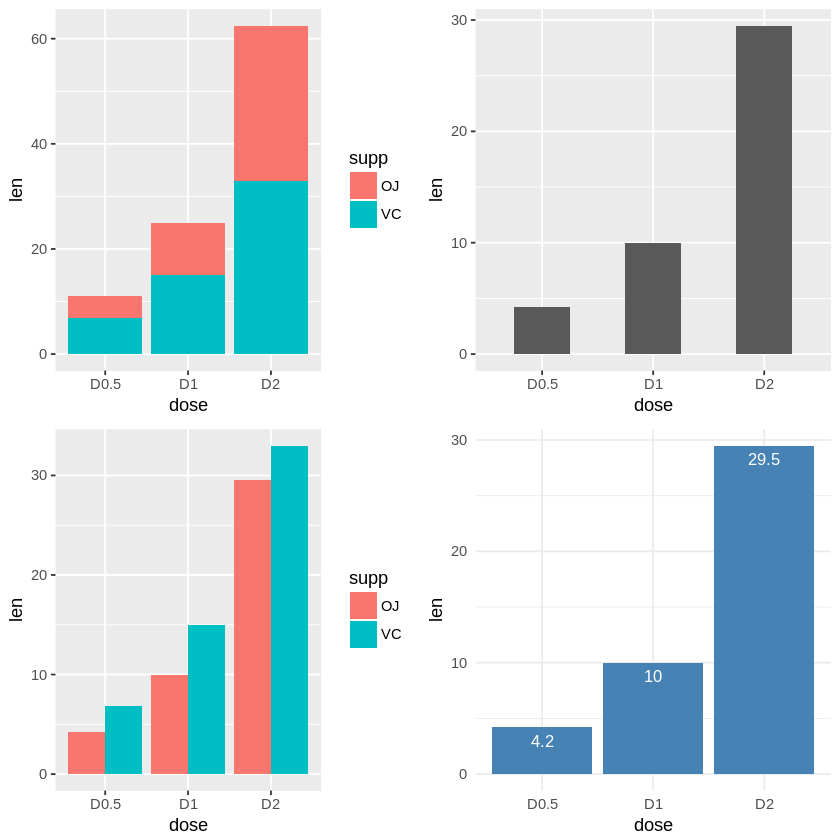

In [82]:
df <- data.frame(dose=c("D0.5", "D1", "D2"),
len=c(4.2, 10, 29.5))
df2 <- data.frame(supp=rep(c("VC", "OJ"), each=3),
dose=rep(c("D0.5", "D1", "D2"),2),
len=c(6.8, 15, 33, 4.2, 10, 29.5))
g <- ggplot(data=df2, aes(x=dose, y=len, fill=supp))
# Stacked bar plot
g1 <- g + geom_bar(stat = "identity")
# Use position=position_dodge()
g2 <- g + geom_bar(stat="identity", position=position_dodge())
# Change the width of bars
g3 <- ggplot(data=df, aes(x=dose, y=len)) +
  geom_bar(stat="identity", width=0.5)
# Inside bars
g4 <- ggplot(data=df, aes(x=dose, y=len)) +
  geom_bar(stat="identity", fill="steelblue")+
  geom_text(aes(label=len), vjust=1.6, color="white", size=3.5)+
  theme_minimal()

multiplot(g1,g2,g3,g4,cols =2 )

## 21.5 Error bar

In [84]:
# Convert the variable dose from a numeric to a factor variable
ToothGrowth$dose <- as.factor(ToothGrowth$dose)
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


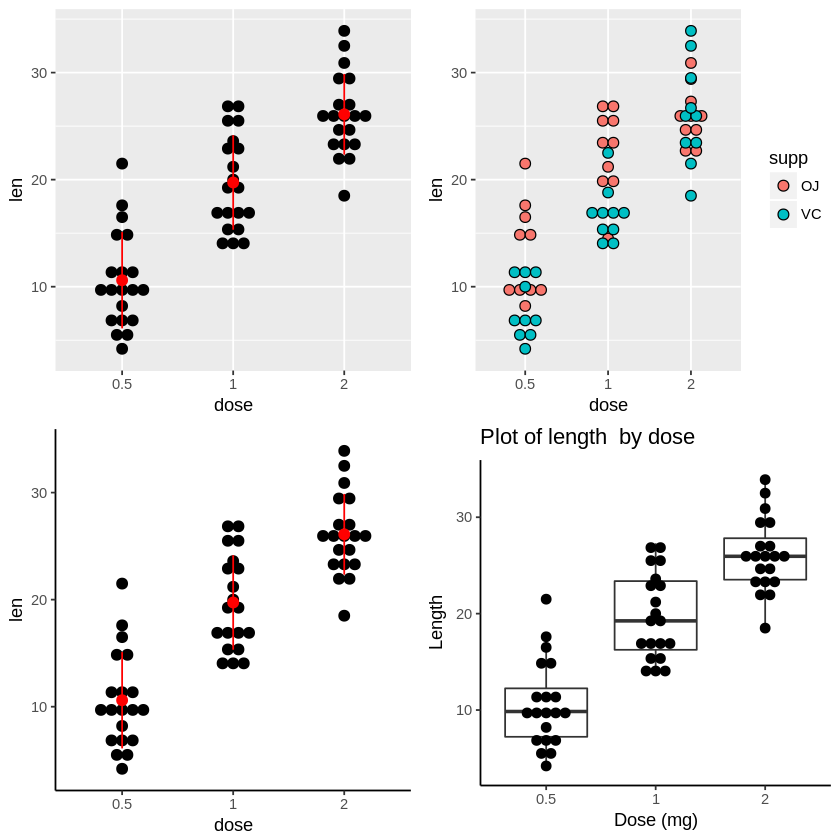

In [94]:
# Basic dot plot
p<-ggplot(ToothGrowth, aes(x=dose, y=len)) + 
  geom_dotplot(binaxis='y', stackdir='center')

# Function to produce summary statistics (mean and +/- sd)
data_summary <- function(x) {
   m <- mean(x)
   ymin <- m-sd(x)
   ymax <- m+sd(x)
   return(c(y=m,ymin=ymin,ymax=ymax))
}

p1 <- p + stat_summary(fun.data=data_summary, color="red")
p2 <- p1 + scale_fill_grey() + theme_classic()
# Change dot plot colors by groups
p3 <- ggplot(ToothGrowth, aes(x=dose, y=len, fill=supp)) +
  geom_dotplot(binaxis='y', stackdir='center') 
# Basic dot box plot
p4 <- ggplot(ToothGrowth, aes(x=dose, y=len)) + 
  geom_boxplot()+
  geom_dotplot(binaxis='y', stackdir='center')+
  labs(title="Plot of length  by dose",x="Dose (mg)", y = "Length")+
  theme_classic()

multiplot(p1,p2,p3,p4,cols =2 )